In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

In [2]:
def f(x):
    return np.sin(2 * np.square(x - 1))


def integral(x, u, v, w):
    if type(w) == int or type(w) == float:
        return u(x) * v(x) * w
    else:
        return u(x) * v(x) * w(x)


def inner(u, v, w):
    return quad(integral, -1, 1, args=(u, v, w))[0]


def coefficients(order):
    numerator = inner(u=f, v=legendre(order), w=1 / 2)
    denominator = inner(u=legendre(order), v=legendre(order), w=1 / 2)
    result = numerator / denominator

    return result


def projection(order):
    projection_poly = np.poly1d(np.zeros(order + 1))
    for j in range(order + 1):
        projection_poly += coefficients(j) * legendre(j)

    return projection_poly, coefficients(0)

In [3]:
x = np.random.uniform(-1, 1, 700)
x_determ = np.linspace(-1, 1, 1000)

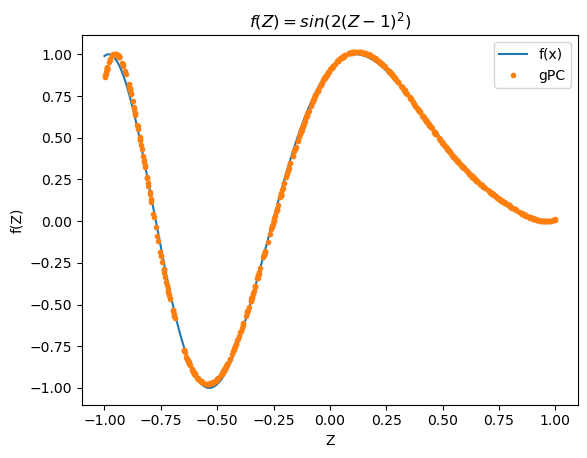

In [4]:
ord = 7
proj, coeff_zero = projection(order=ord)
plt.plot(x_determ, f(x_determ), label='f(x)')
plt.plot(x, proj(x), '.', label='gPC')
plt.title(r"$f(Z) = sin(2(Z-1)^2)$")
plt.xlabel("Z")
plt.ylabel("f(Z)")
plt.legend()
plt.show()

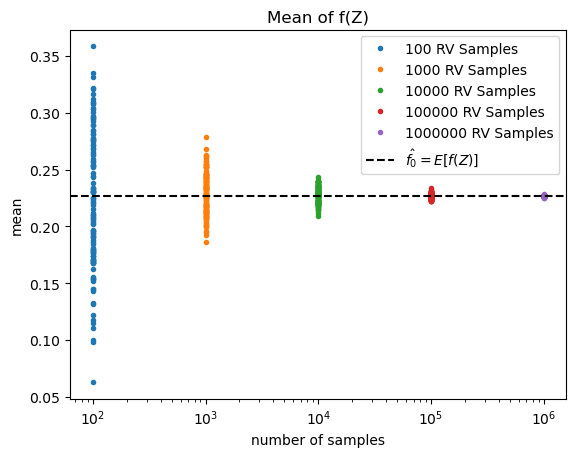

In [5]:
samples = [100, 1000, 10000, 100000, 1000000]
sample_mean = {}
sample_var = {}
for num in samples:
    mean = []
    var = []
    for _ in range(120):
        Z = np.random.uniform(-1, 1, num)
        mean_MC = np.mean(f(Z))
        var_MC = np.var(f(Z))
        mean.append(mean_MC)
        var.append(var_MC)
    sample_mean[num] = mean
    sample_var[num] = var

    plt.semilogx([num] * len(sample_mean[num]), sample_mean[num], '.', label=f"{num} RV Samples")

plt.axhline(coeff_zero, color='black', linestyle='--', label=r'$\hat{f_0}=E[f(Z)]$')
plt.title("Mean of f(Z)")
plt.xlabel("number of samples")
plt.ylabel("mean")
plt.legend()
plt.show()

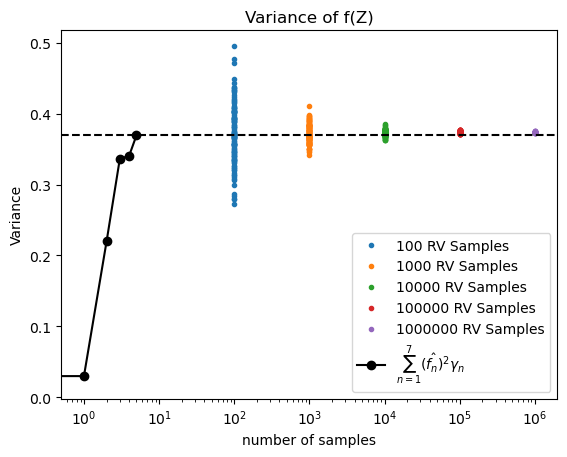

In [6]:
var_analytic = [np.sum(np.square(coefficients(i + 1)) * inner(u=legendre(i + 1), v=legendre(i + 1), w=1 / 2)) for i in
                range(ord - 1)]

plt.figure()
plt.title("Variance of f(Z)")
for num in samples:
    plt.semilogx([num] * len(sample_var[num]), sample_var[num], '.', label=f"{num} RV Samples")
plt.semilogx(np.cumsum(var_analytic), '-o', color='black', label=r"$\sum_{n=1}^{7} (\hat{f_n})^{2}\gamma_n$")
plt.axhline(np.cumsum(var_analytic)[-1], color='black', linestyle='--')
plt.title("Variance of f(Z)")
plt.xlabel("number of samples")
plt.ylabel("Variance")
plt.legend()
plt.show()